In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import warnings

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
#Others
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Suppress warnings
warnings.filterwarnings("ignore")
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")
df = data.copy()
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Data Description :
- According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
- This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

## Attribute Information
- 1) id: unique identifier
- 2) gender: "Male", "Female" or "Other"
- 3) age: age of the patient
- 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- 6) ever_married: "No" or "Yes"
- 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- 8) Residence_type: "Rural" or "Urban"
- 9) avg_glucose_level: average glucose level in blood
- 10) bmi: body mass index
- 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- 12) stroke: 1 if the patient had a stroke or 0 if not
- *Note: "Unknown" in smoking_status means that the information is unavailable for this patient

# Tasks
- Drop the Id Columns


In [4]:
#CORRECTING
#Detecting outliers and error inputs
print("_"*100)
for f in df.columns :
    if df[f].dtype == "O" :
        print(f,"values are :")
        print(df[f].unique().tolist())
        print("_"*100)
    else :
        print(f,"values are :")
        print(sorted(df[f].unique().tolist()))
        print("_"*100)


____________________________________________________________________________________________________
id values are :
[67, 77, 84, 91, 99, 121, 129, 132, 156, 163, 170, 172, 187, 205, 210, 224, 239, 242, 247, 259, 298, 315, 321, 338, 347, 354, 355, 364, 365, 394, 448, 452, 458, 464, 479, 491, 507, 530, 533, 542, 545, 559, 563, 575, 579, 587, 621, 641, 711, 712, 721, 724, 727, 728, 737, 739, 742, 751, 760, 768, 782, 808, 809, 820, 841, 844, 875, 887, 897, 917, 924, 937, 949, 954, 966, 967, 1077, 1099, 1112, 1116, 1119, 1151, 1164, 1183, 1191, 1192, 1210, 1213, 1218, 1225, 1231, 1246, 1260, 1261, 1275, 1301, 1307, 1323, 1329, 1405, 1451, 1454, 1460, 1473, 1486, 1499, 1503, 1505, 1506, 1534, 1552, 1577, 1625, 1656, 1665, 1666, 1678, 1679, 1681, 1686, 1696, 1703, 1731, 1737, 1741, 1772, 1818, 1821, 1825, 1836, 1842, 1845, 1847, 1893, 1924, 1953, 1989, 2005, 2013, 2019, 2029, 2044, 2070, 2082, 2092, 2109, 2138, 2182, 2209, 2218, 2244, 2265, 2267, 2275, 2291, 2296, 2304, 2313, 2314, 2326, 232

In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df[df["bmi"].isna()] #sui

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [8]:
#Drop the missing values
df.dropna(inplace=True)


In [9]:
df1 = df.drop(columns=["id"],axis=1).reset_index(drop=True)
df1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4904,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
4905,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4906,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4907,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# EDA :

In [10]:
#Summary Statistics :
df1.describe(include="all")

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4909,4909.000000,4909.000000,4909.000000,4909,4909,4909,4909.000000,4909.000000,4909,4909.000000
unique,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2897,NaN,NaN,NaN,3204,2811,2490,NaN,NaN,1852,NaN
mean,NaN,42.865374,0.091872,0.049501,NaN,NaN,NaN,105.305150,28.893237,NaN,0.042575
std,NaN,22.555115,0.288875,0.216934,NaN,NaN,NaN,44.424341,7.854067,NaN,0.201917
min,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.070000,23.500000,NaN,0.000000
50%,NaN,44.000000,0.000000,0.000000,NaN,NaN,NaN,91.680000,28.100000,NaN,0.000000
75%,NaN,60.000000,0.000000,0.000000,NaN,NaN,NaN,113.570000,33.100000,NaN,0.000000


## Data Distribution

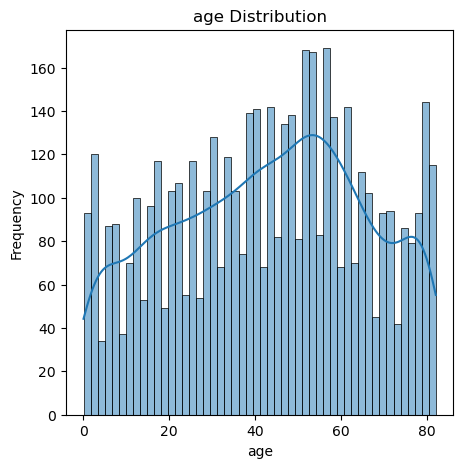

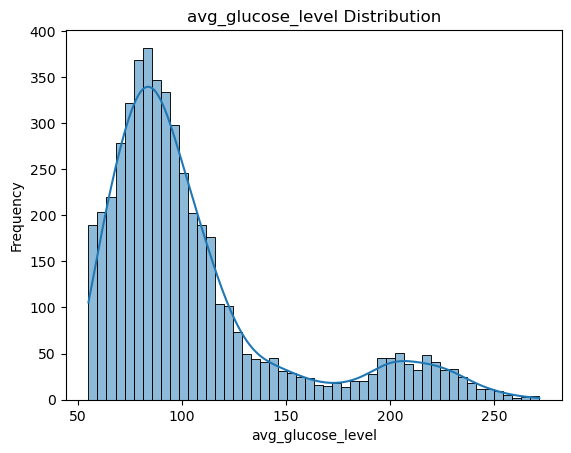

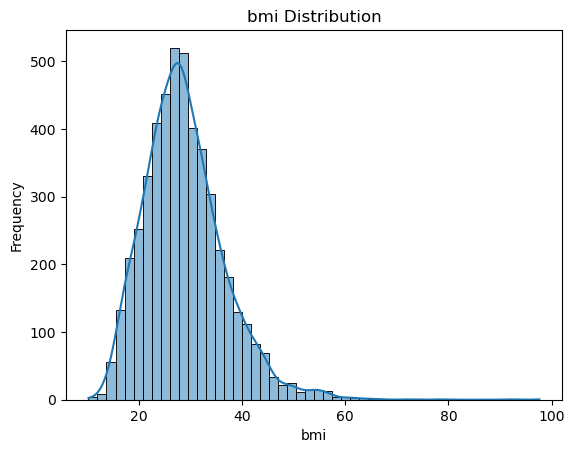

In [11]:
def plot_hist(df1):
    numerical_continuos_features = [f for f in df1.columns if df1[f].dtype != "O" and df1[f].nunique() > 25]
    plt.figure(figsize=(5,5))
    bins = 50
    for f in numerical_continuos_features :
    #     plt.hist(data[f],bins=bins,edgecolor="black")
        sns.histplot(df1[f], kde=True,bins=bins)
        plt.xlabel(f)
        plt.ylabel('Frequency')
        plt.title(f + ' Distribution')
        plt.show()
plot_hist(df1)

## Categorical Variables Analysis:

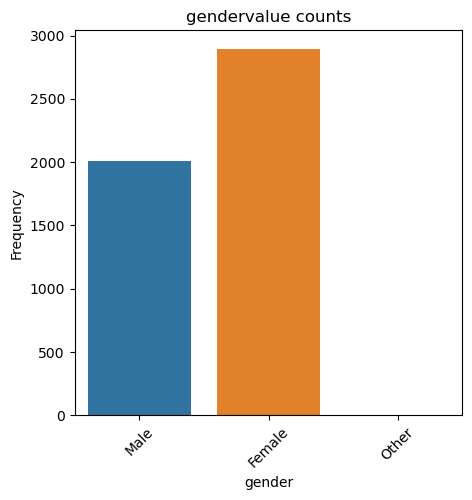

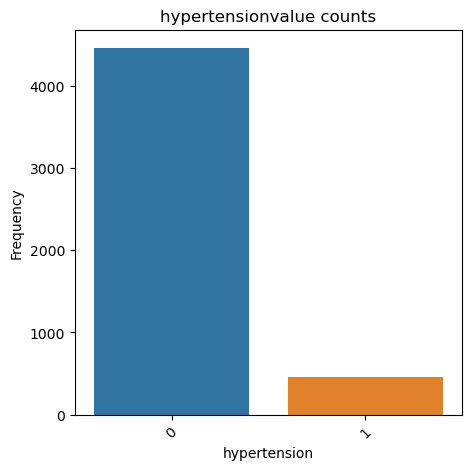

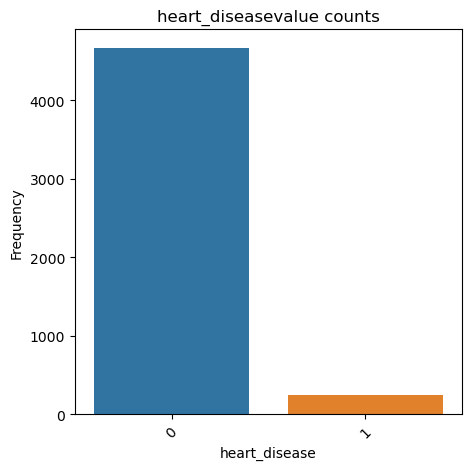

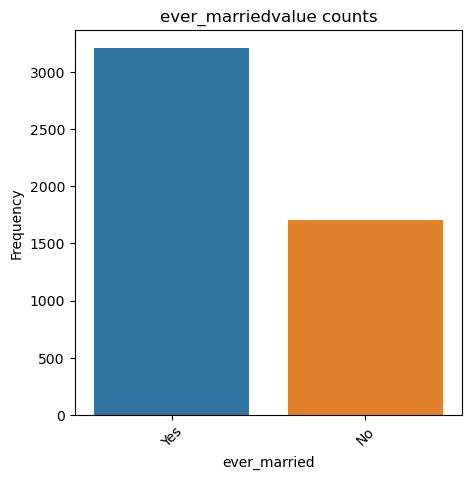

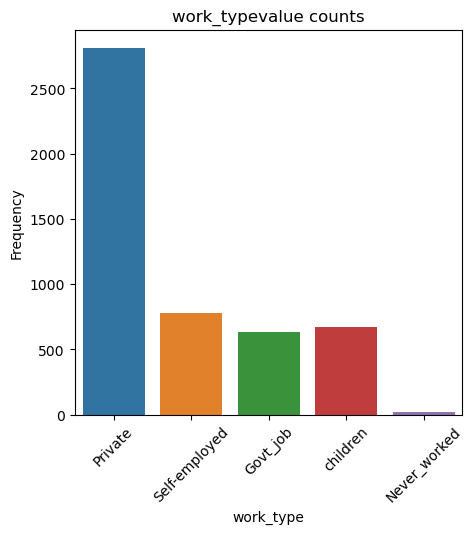

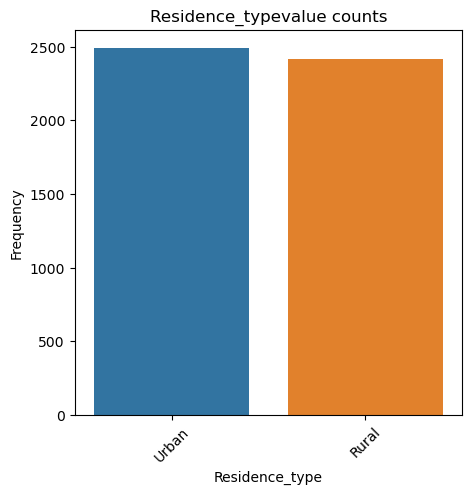

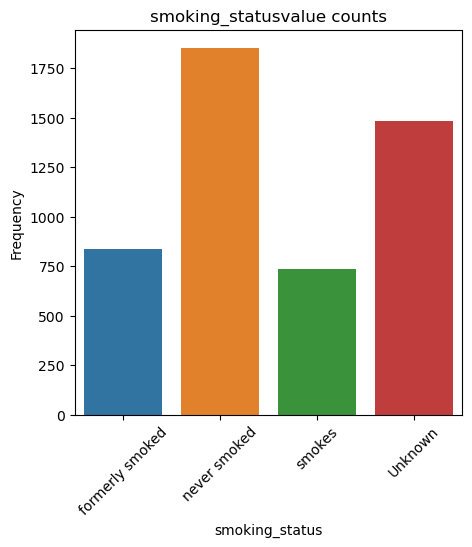

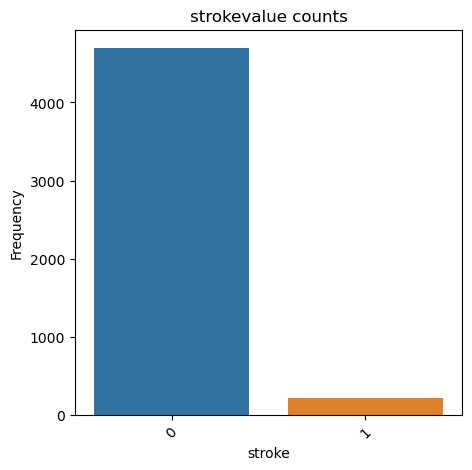

In [12]:
 def plot_count(df1):
    Categorical_Discrete_features = [f for f in df1.columns if df1[f].nunique() < 25]

    for f in Categorical_Discrete_features:
        plt.figure(figsize=(5, 5))
        sns.countplot(data=df1, x=f)
        plt.xlabel(f)
        plt.ylabel('Frequency')
        plt.title(f + 'value counts')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.show()

plot_count(df1)

## Correlation Analysis:

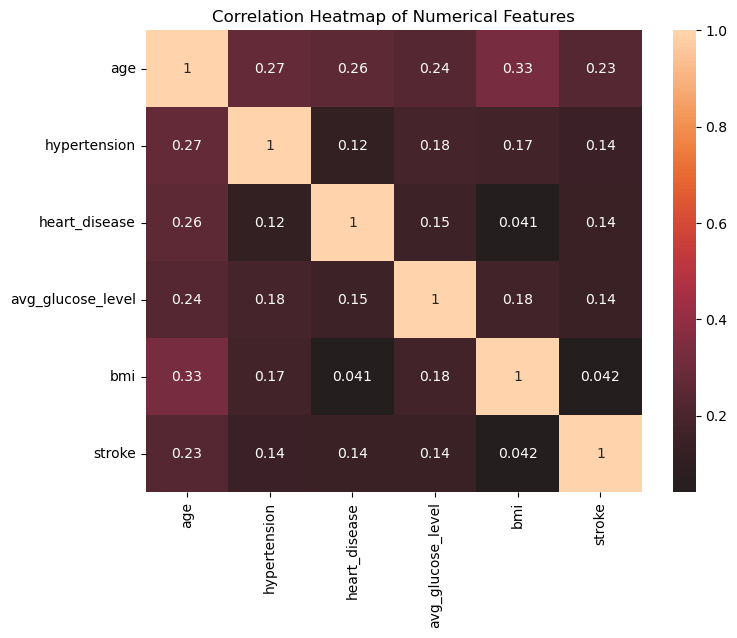

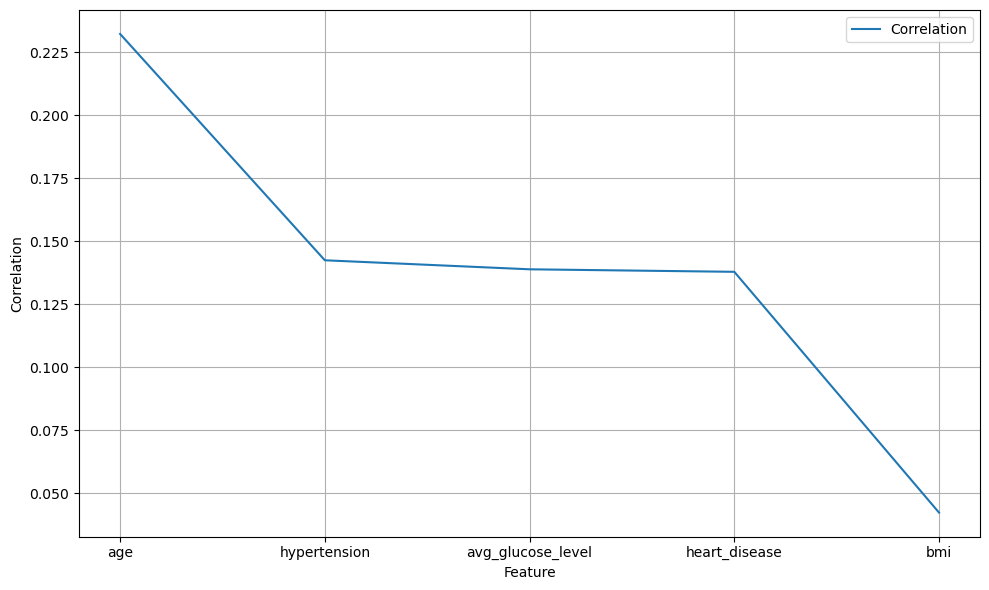

In [13]:
 def plot_heatmap(df1):
    # Calculate the correlation matrix for selected numerical features
    numerical_features = [f for f in df1.columns if df1[f].dtype != "O"] 
    corr = df1[numerical_features].corr()

    # Create a heatmap for the correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, center=0)
    plt.title('Correlation Heatmap of Numerical Features')
    plt.show()
    
plot_heatmap(df1)

numerical_features = [f for f in df1.columns if df1[f].dtype != "O"] 
corr = df1[numerical_features].corr()
# Plot feature correlations with target variable
plt.figure(figsize=(10,6))
plt.plot(corr["stroke"].sort_values(ascending=False)[1:],label="Correlation")
plt.ylabel("Correlation")
plt.xlabel("Feature")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Outliers Detection :

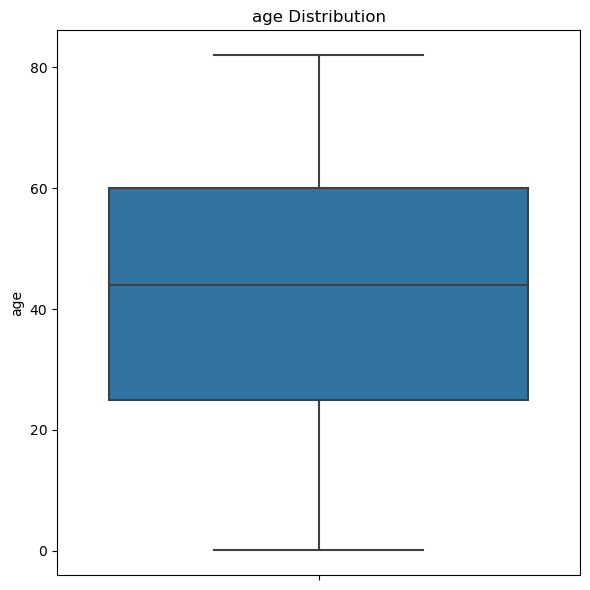

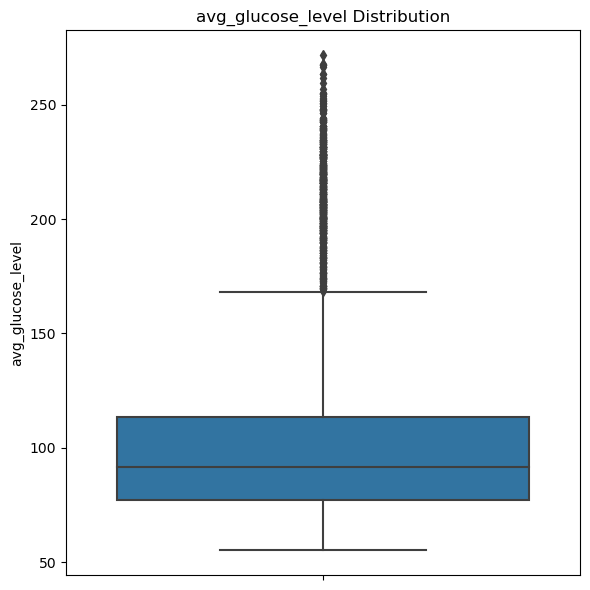

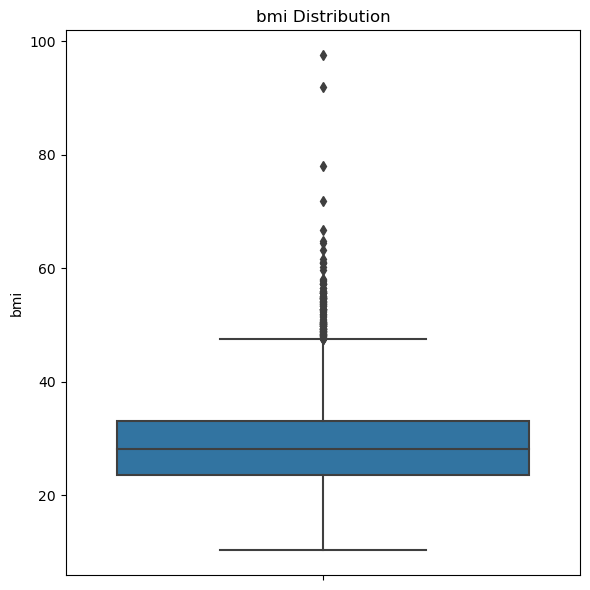

In [14]:
def plot_boxplot(df):
    numerical_continuous_features = ['age', 'avg_glucose_level', 'bmi']
    
    for f in numerical_continuous_features:
        plt.figure(figsize=(6, 6))
        sns.boxplot(data=df, y=f)
        plt.title(f + ' Distribution')
        plt.tight_layout()
        plt.show()
plot_boxplot(df1)

**There are Outliers detected that we will handle them later :D**

## Pairplot

<Figure size 500x500 with 0 Axes>

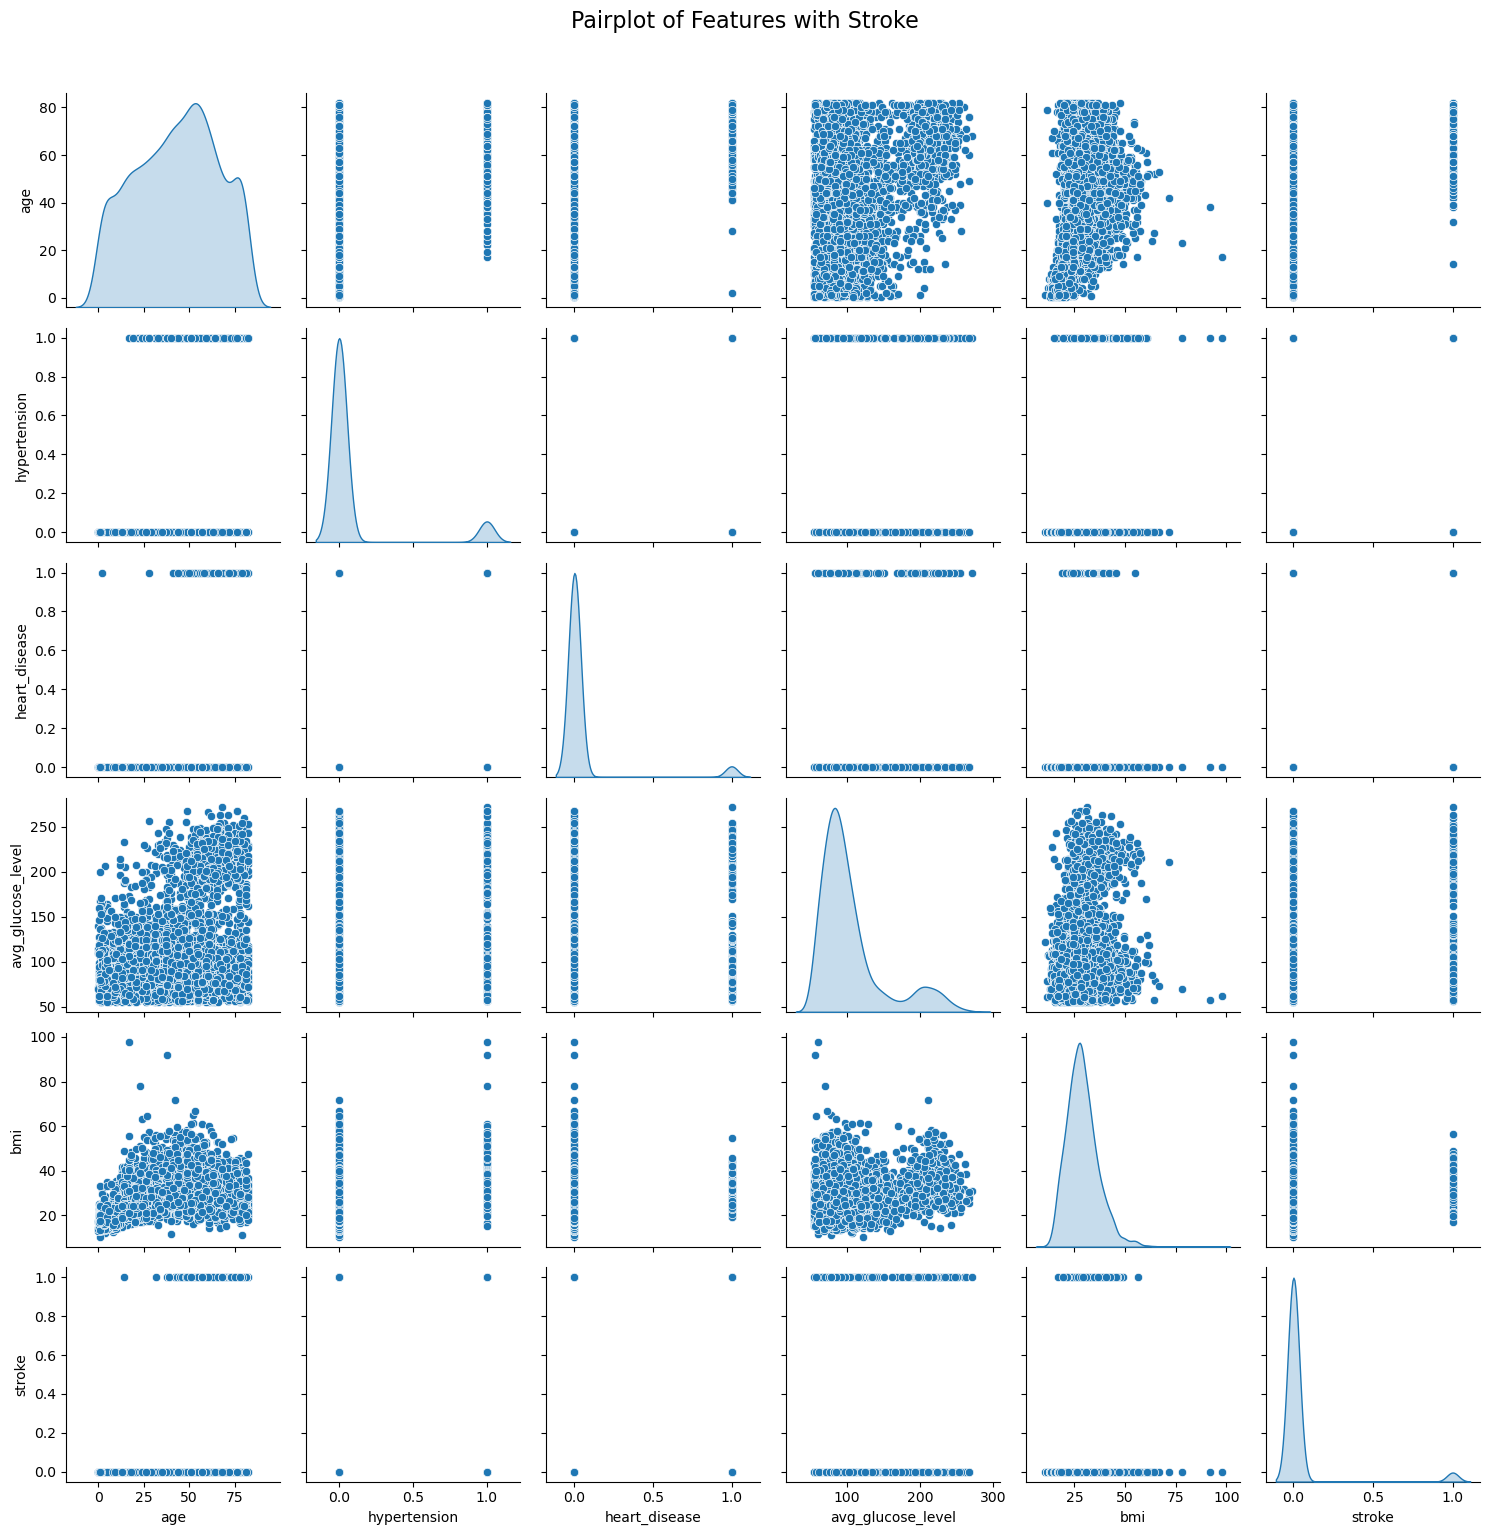

In [15]:
plt.figure(figsize=(5,5))
sns.pairplot(data=df1, diag_kind='kde',)
plt.suptitle('Pairplot of Features with Stroke', y=1.02, size=16)
plt.tight_layout()
plt.show()

In [16]:
df1.columns.tolist()

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

## Data Analysis

1. What is the distribution of genders in the dataset?
2. Does hypertension increase the likelihood of stroke?

### Does hypertension increase the likelihood of stroke?


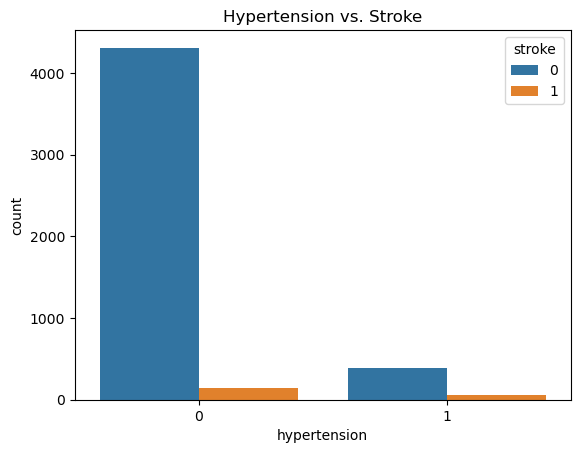

In [17]:
sns.countplot(data=df1, x='hypertension', hue='stroke')
plt.title('Hypertension vs. Stroke')
plt.show()

### Does marriage status influence stroke occurrence?


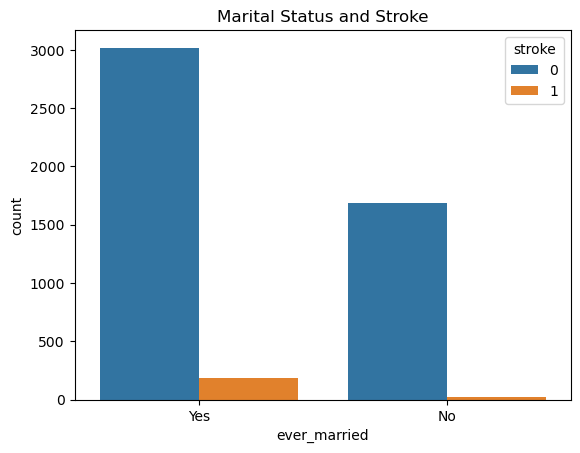

In [18]:
sns.countplot(data=df1, x='ever_married', hue='stroke')
plt.title('Marital Status and Stroke')
plt.show()

### Is there a difference in stroke occurrence between residence types?

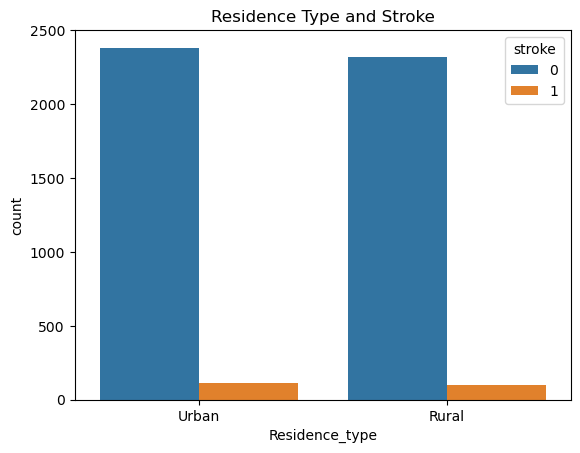

In [19]:
sns.countplot(data=df1, x='Residence_type', hue='stroke')
plt.title('Residence Type and Stroke')
plt.show()


### What is the impact of average glucose levels on stroke?


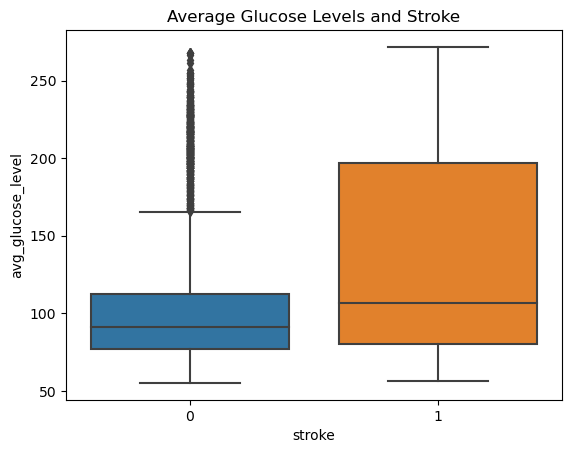

In [20]:
sns.boxplot(data=df1, x='stroke', y='avg_glucose_level')
plt.title('Average Glucose Levels and Stroke')
plt.show()

### How is BMI distributed among the individuals?

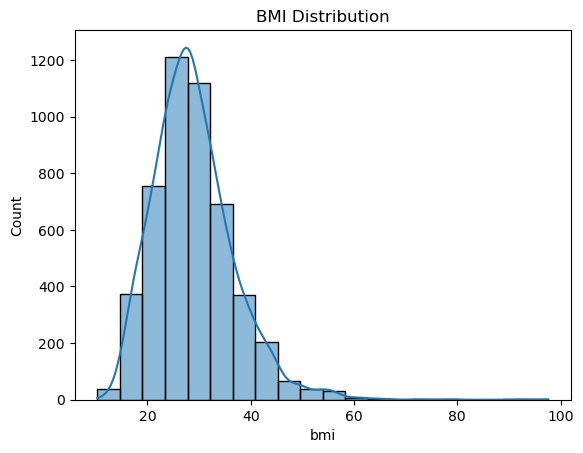

In [21]:
sns.histplot(data=df1, x='bmi', bins=20, kde=True)
plt.title('BMI Distribution')
plt.show()

### What is the impact of age and gender on stroke occurrence for different work types?


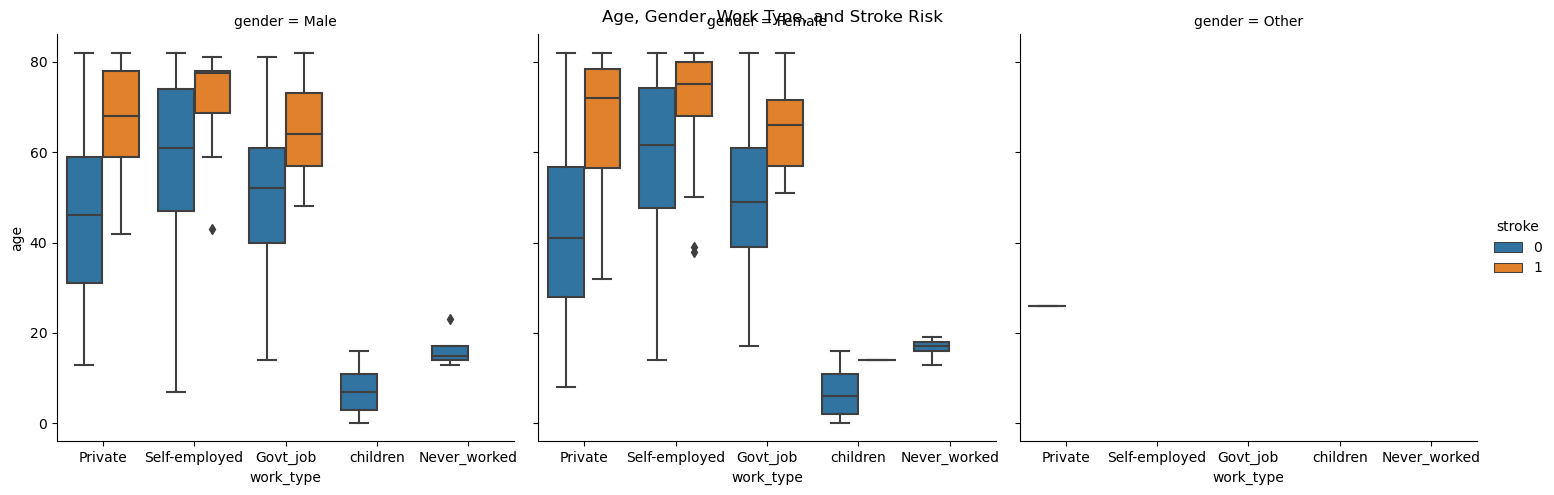

In [22]:
sns.catplot(data=df1, x='work_type', y='age', hue='stroke', col='gender', kind='box')
plt.suptitle('Age, Gender, Work Type, and Stroke Risk')
plt.show()

### How does marital status influence the relationship between glucose levels and stroke risk?

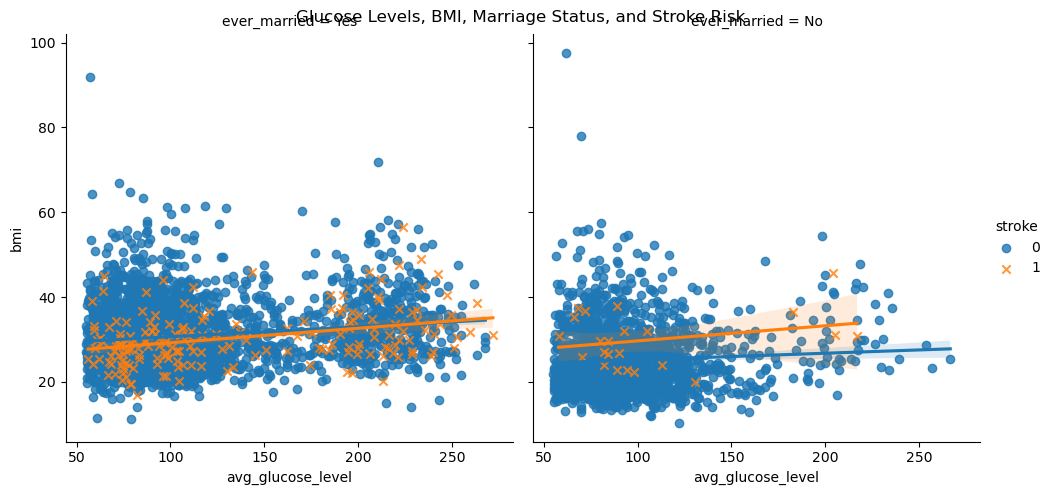

In [23]:
sns.lmplot(data=df1, x='avg_glucose_level', y='bmi', hue='stroke', col='ever_married', markers=['o', 'x'])
plt.suptitle('Glucose Levels, BMI, Marriage Status, and Stroke Risk')
plt.show()

### Does the effect of smoking status on stroke risk differ by gender?


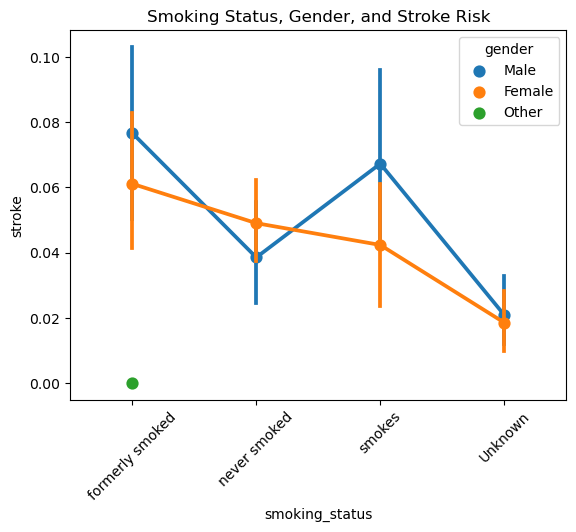

In [24]:
sns.pointplot(data=df1, x='smoking_status', y='stroke', hue='gender')
plt.title('Smoking Status, Gender, and Stroke Risk')
plt.xticks(rotation=45)
plt.show()

### Is there an association between hypertension, smoking status, and stroke risk?

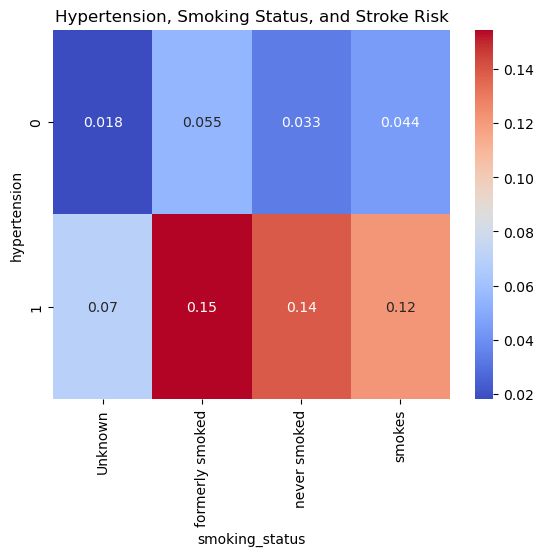

In [25]:
sns.heatmap(pd.crosstab(df1['hypertension'], df1['smoking_status'], df1['stroke'], aggfunc='mean'), annot=True, cmap='coolwarm')
plt.title('Hypertension, Smoking Status, and Stroke Risk')
plt.show()

# Model Building 

## Handling Outliers

In [26]:
numerical_continuous_features = [f for f in df1.columns if df1[f].dtype != "O" and df1[f].nunique() > 50]
df1.shape

(4909, 11)

In [27]:
def remove_outliers_iqr(dataframe, columns, threshold=1):
    cleaned_dataframe = dataframe.copy()
    for column in columns:
        q1 = dataframe[column].quantile(0.25)
        q3 = dataframe[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        cleaned_dataframe = cleaned_dataframe[(cleaned_dataframe[column] >= lower_bound) & (cleaned_dataframe[column] <= upper_bound)]
    return cleaned_dataframe

def count_outliers(df, feature, threshold=1):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    num_outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].shape[0]
    
    return num_outliers

def get_outlier_rows(df, feature, threshold=1):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    outlier_rows = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    
    return outlier_rows

In [28]:
for feature in numerical_continuous_features:
    print(count_outliers(df1,feature))

outlier_rows_avg_glucose = set(get_outlier_rows(df1, 'avg_glucose_level').index)
outlier_rows_bmi = set(get_outlier_rows(df1, 'bmi').index)

same_outlier_rows_series = [index in outlier_rows_bmi for index in df1.index]

same_outlier_rows_df = df1[same_outlier_rows_series]
print("Same rows outliers :",len(same_outlier_rows_df))

0
664
267
Same rows outliers : 267


In [29]:
#Results
df2 = remove_outliers_iqr(df1,numerical_continuous_features,0.8)
df2.shape

(3852, 11)

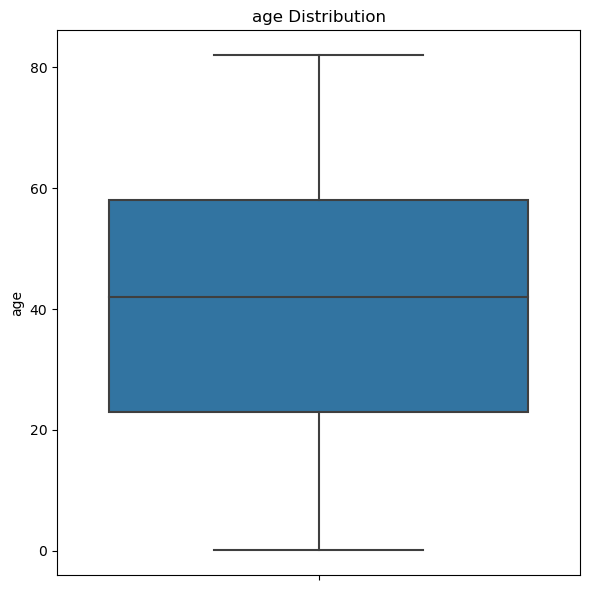

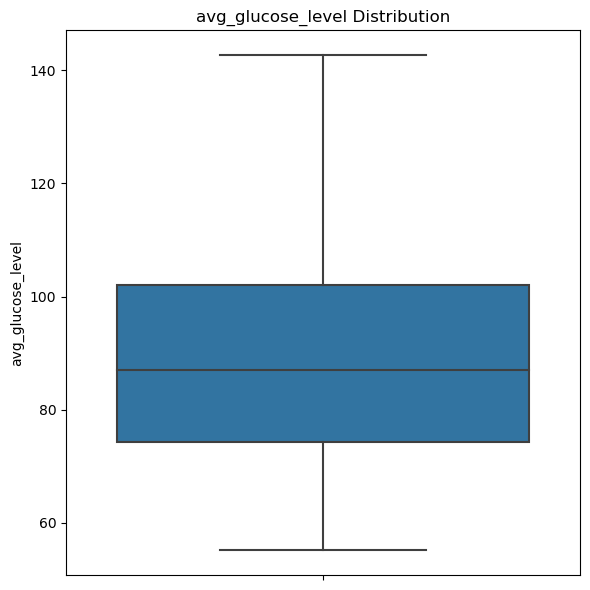

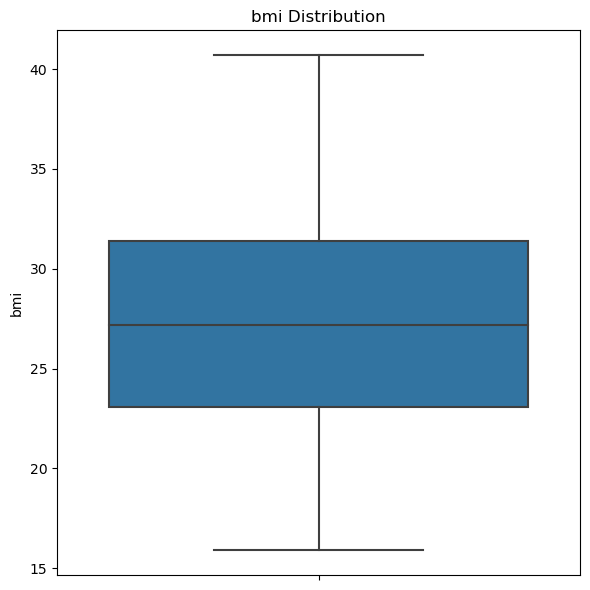

In [30]:
plot_boxplot(df2)

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3852 entries, 1 to 4908
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3852 non-null   object 
 1   age                3852 non-null   float64
 2   hypertension       3852 non-null   int64  
 3   heart_disease      3852 non-null   int64  
 4   ever_married       3852 non-null   object 
 5   work_type          3852 non-null   object 
 6   Residence_type     3852 non-null   object 
 7   avg_glucose_level  3852 non-null   float64
 8   bmi                3852 non-null   float64
 9   smoking_status     3852 non-null   object 
 10  stroke             3852 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 361.1+ KB


## 

# Skewed data / Data Distribution 

In [32]:

def box_cox_transformation(df2):
    numerical_continuous_features = [f for f in df2.columns if df2[f].dtype != "O" and df2[f].nunique() > 50]
    data = df2.copy()
    for feature in numerical_continuous_features:
        # Generate some skewed data
        skewed_data = data[feature]

        # Apply Box-Cox transformation
        data[feature], lambda_param = stats.boxcox(skewed_data)

        # Plot original and transformed data using Seaborn histograms
        plt.figure(figsize=(10, 6))
        plt.subplot(2, 1, 1)
        sns.histplot(skewed_data, bins=30, color='blue', kde=True)
        plt.title("After")

        plt.subplot(2, 1, 2)
        sns.histplot(transformed_data, bins=30, color='green', kde=True)
        plt.title("Befre : Box-Cox Transformed Data")

        plt.tight_layout()
        plt.show()
    return data


NameError: name 'transformed_data' is not defined

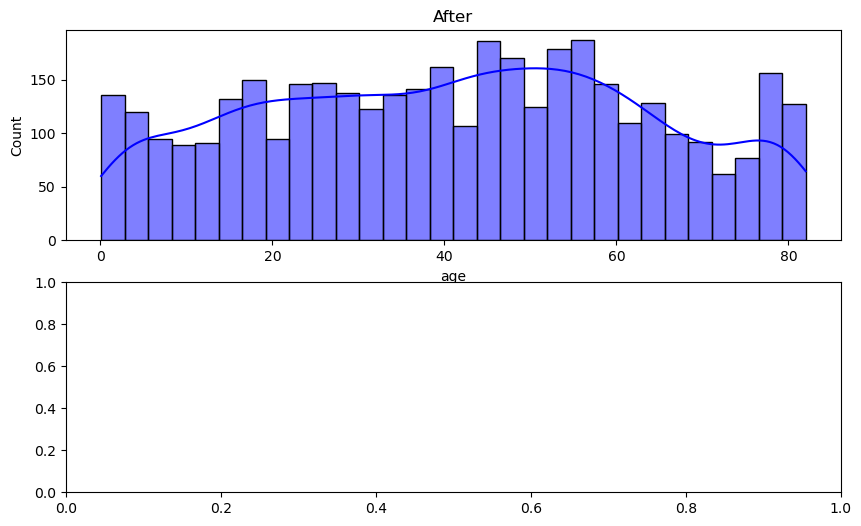

In [33]:
df3 = box_cox_transformation(df2)


In [ ]:
df3

## Categorical Encoding 

In [ ]:
categorical_features = [f for f in df3.columns if df3[f].dtype == "O" ]
df3[categorical_features]

In [ ]:
#gender Feature :
le_gender = LabelEncoder()
df3['gender_encoded'] = le_gender.fit_transform(df3['gender'])
df3

In [ ]:
#ever married
le_ever_married = LabelEncoder()
df3['ever_married_encoded'] = le_ever_married.fit_transform(df3['ever_married'])
df3

In [ ]:
df_work_type_encoded = pd.get_dummies(df3['work_type'], prefix='work_type')
df3 = pd.concat([df3, df_work_type_encoded], axis=1)

In [ ]:
df3

In [ ]:
le_residence_type = LabelEncoder()
df3['residence_type_encoded'] = le_residence_type.fit_transform(df3['Residence_type'])
df3

In [ ]:
df_smoking_status_encoded = pd.get_dummies(df3['smoking_status'], prefix='smoking_status')
df3 = pd.concat([df3, df_smoking_status_encoded], axis=1)

In [ ]:
df3

In [ ]:
df4 = df3.select_dtypes(exclude=["O"]).reset_index()
df4.sample(10)

### Data Double Check .reset_index() later

In [ ]:
print(df4.info())
df4.describe(include="all")

# Model Creation

In [ ]:

X = df4.drop(columns=["stroke"],axis="columns")
Y = df4["stroke"]
x_train,x_val,y_train,y_val = train_test_split(X,Y,
                                               random_state = 217,
                                               shuffle = True,
                                               train_size = .75)
x_train.shape,x_val.shape,y_train.shape,y_val.shape

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Create a list of classifiers
classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC(probability=True)),  # Set probability to True
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Neural Network', MLPClassifier(max_iter=1000)),
    ('XGBoost', XGBClassifier())
]

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

# Train and evaluate each classifier
for name, clf in classifiers:
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_val)
    
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    
    # Calculate ROC AUC only if predict_proba is available
    if hasattr(clf, "predict_proba"):
        roc_auc = roc_auc_score(y_val, clf.predict_proba(x_val)[:, 1])
    else:
        roc_auc = None
    
    results_df = results_df.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }, ignore_index=True)

# Display the results DataFrame
pd.DataFrame(results_df)

# Hyperparamaters tunning

In [ ]:


# Create a list of classifiers with hyperparameter grids
classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=1000), {'C': [0.001, 0.01, 0.1, 1, 10]}),
    ('Decision Tree', DecisionTreeClassifier(), {'max_depth': [None, 10, 20, 30]}),
    ('Random Forest', RandomForestClassifier(), {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30]}),
    ('Support Vector Machine', SVC(probability=True), {'C': [0.001, 0.01, 0.1, 1, 10]}),
    ('K-Nearest Neighbors', KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    ('Naive Bayes', GaussianNB(), {}),
    ('Neural Network', MLPClassifier(max_iter=1000), {'hidden_layer_sizes': [(50,), (100,), (50, 50)]}),
    ('XGBoost', XGBClassifier(), {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]})
]

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Best Parameters', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

# Train and evaluate each classifier with GridSearchCV
for name, clf, param_grid in classifiers:
    grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
    grid_search.fit(x_train, y_train)
    clf = grid_search.best_estimator_
    
    y_pred = clf.predict(x_val)
    
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    
    # Calculate ROC AUC only if predict_proba is available
    if hasattr(clf, "predict_proba"):
        roc_auc = roc_auc_score(y_val, clf.predict_proba(x_val)[:, 1])
    else:
        roc_auc = None
    
    results_df = results_df.append({
        'Model': name,
        'Best Parameters': grid_search.best_params_,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }, ignore_index=True)

# Display the results DataFrame
pd.DataFrame(results_df)
